In [19]:

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import matplotlib.patches as mpatches


/tmp/ipykernel_29557/2412738986.py:29: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X1 = np.random.multivariate_normal(mean21, cov21, n)
/tmp/ipykernel_29557/2412738986.py:30: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X2 = np.random.multivariate_normal(mean22, cov22, n)


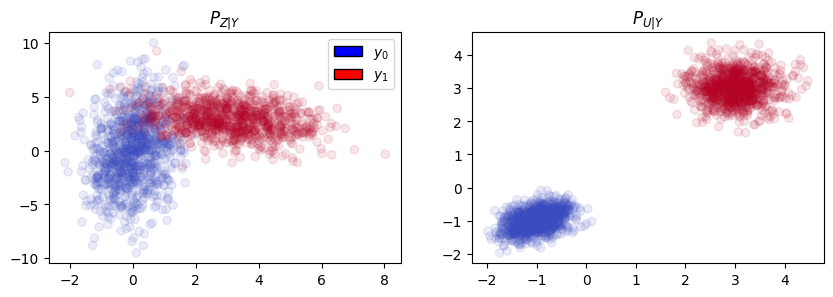

In [30]:
# Make 2 2d gaussians with different means and covariances

np.random.seed(0)

n = 1000

# data in embeddings Z 
mean11 = [0, 0]
mean12 = [3, 3]
cov11 = [[0.5, 0.5], [0.5, 10]]
cov12 = [[2, -0.5], [-0.5, 2]]

X1 = np.random.multivariate_normal(mean11, cov11, n)
X2 = np.random.multivariate_normal(mean12, cov12, n)


XZ = np.concatenate([X1, X2])
y = np.concatenate([np.zeros(n), np.ones(n)])

# data in embeddings U


mean21 = [-1, -1]
mean22 = [3, 3]
cov21 = [[0.1, 0], [0.1, 0.1]]
cov22 = [[0.2, 0], [0, -0.2]]


X1 = np.random.multivariate_normal(mean21, cov21, n)
X2 = np.random.multivariate_normal(mean22, cov22, n)

XU = np.concatenate([X1, X2])

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ax[0].scatter(XZ[:, 0], XZ[:, 1], c=y, alpha=0.1, cmap='coolwarm')
ax[0].set_title('$P_{Z|Y}$')

ax[1].scatter(XU[:, 0], XU[:, 1], c=y, alpha=0.1, cmap='coolwarm')
ax[1].set_title('$P_{U|Y}$')

# add legend with color patches
legend_elements = [mpatches.Patch(facecolor='blue', edgecolor='black', label='$y_0$'),
                   mpatches.Patch(facecolor='red', edgecolor='black', label='$y_1$')]

ax[0].legend(handles=legend_elements)

plt.show()


path = Path(f"../../papers/emir-embedding-comparison/talk_figs/separability.pdf")
fig.savefig(path, bbox_inches='tight')



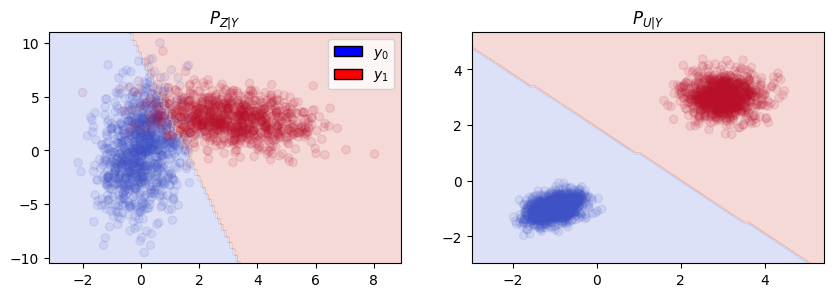

In [33]:

# Train a classifier on the embeddings 

from sklearn.linear_model import LogisticRegression

clfZ = LogisticRegression()
clfZ.fit(XZ, y)
Zy_pred = clfZ.predict(XZ)


clfU = LogisticRegression()
clfU.fit(XU, y)
Uy_pred = clfU.predict(XU)

# Same plot as above but with decision boundary

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ax[0].scatter(XZ[:, 0], XZ[:, 1], c=y, alpha=0.1, cmap='coolwarm')
ax[0].set_title('$P_{Z|Y}$')

ax[1].scatter(XU[:, 0], XU[:, 1], c=y, alpha=0.1, cmap='coolwarm')
ax[1].set_title('$P_{U|Y}$')

# add legend with color patches
legend_elements = [mpatches.Patch(facecolor='blue', edgecolor='black', label='$y_0$'),
                   mpatches.Patch(facecolor='red', edgecolor='black', label='$y_1$')]

ax[0].legend(handles=legend_elements)

# plot decision boundary

x_min, x_max = XZ[:, 0].min() - 1, XZ[:, 0].max() + 1
y_min, y_max = XZ[:, 1].min() - 1, XZ[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clfZ.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax[0].contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

x_min, x_max = XU[:, 0].min() - 1, XU[:, 0].max() + 1
y_min, y_max = XU[:, 1].min() - 1, XU[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

U = clfU.predict(np.c_[xx.ravel(), yy.ravel()])
U = U.reshape(xx.shape)

ax[1].contourf(xx, yy, U, alpha=0.2, cmap='coolwarm')


path = Path(f"../../papers/emir-embedding-comparison/talk_figs/separability_decision_boundary.pdf")
fig.savefig(path, bbox_inches='tight')
